### Simple Neural Network Implementation in Python

This notebook implements the forward propagation step of neural networks using Python.  
To demonstrate the results of forward prop, I have used pre-trained weights from Coursera Advanced Algorithms, Week 1, lab 2. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def coffee_roast_plot(X, Y):
    """
    Objective- creates a scatter plot for good and bad coffee
                decision boundaries.
    Arguments- 
    X (n-d array)- contains temperature and roast duration of coffee
    Y (1-d array)- contains 1 and 0 for good roast, bad roast
    Return-
    A scatter plot with boundaries.
    """
    
    good_coffee_index = Y == 1
    bad_coffee_index = Y == 0
    fig, ax = plt.subplots(1,1, figsize = (4,4))

    ##scatter plot for both coffee types
    ax.scatter(X.loc[good_coffee_index,'temperature'], X.loc[good_coffee_index,'duration'], s = 50, 
               marker = 'x', c = 'red', label = 'Good Roast')
    ax.scatter(X.loc[bad_coffee_index, 'temperature'], X.loc[bad_coffee_index, 'duration'], s = 70, 
              marker = 'o', facecolors = 'none', edgecolors = 'darkblue', linewidth = 1, label = 'Bad Roast')

    ##the 3 lines as seen in the plot
    ax.axhline(y = 12, color = "orange", linewidth = 1.5)
    ax.axvline(x = 175, color = "orange", linewidth = 1.5)
    #the slant line
    #xcoordinates for the slant line
    xi = np.linspace(start = 175, stop = 260, num = 50)
    #y coordinates for the slant line
    yi = (-3/85) * xi + 21
    ax.plot(xi, yi, color = "orange", linewidth = 1.5)

    ##title, subtitles etc.
    ax.set_title(f"Coffee Roasting dataset", size = 11)
    ax.set_xlabel("Temperature \n(Celcius)", size = 8)
    ax.set_ylabel("Duration \n(minutes)", size = 8)
    ax.legend(loc = "upper right")
    plt.show()

In [1]:
#defining sigmoid function to be used as activation function in this notebook
def sigmoid(x):
    """
    Objective- apply sigmoid function on the given scalar x
    Returns- value between 0 to 1
    """
    g = 1/(1 + np.exp(-x))
    return g

In [16]:
#function to normalize the dataset
def zscore_norm(df, mean_, std_):
    """
    Objective- normalize the df using zscore
    Return- normalized dataset
    Arguments- 
    df- dataframe to be normalized
    mean_ - list of means of all columns of the dataframe
    std_ - stardard deviation of all columns of the dataframe
    """
    df_i = df - mean_
    df_i = df_i/std_
    df_norm = df_i
    return df_norm

In [22]:
#Dense function computes activation output vector for each layer
def Dense(a_in, W, b):
    """
    Objective- compute the activation output of one layer.
    Returns- 1-D vector with output of each neuron.
    Arguments-
    a_in- input from previous layer
    W- matrix of weights for current layer
    b (1,total units)- matrix of biases for current layer. 
    """
    total_neurons = W.shape[1]
    a_out = np.zeros(total_neurons)
    for j in range(total_neurons):
        z = np.dot(a_in, W[:,j]) + b[j]
        a_out[j] = sigmoid(z)
    return a_out

In [23]:
#define the sequential function
def Sequential(X, W1, b1, W2, b2):
    a1 = Dense(X, W1, b1)
    a2 = Dense(a1, W2, b2)
    return a2

In [4]:
#read coffee roast dataset
data = pd.read_csv('data/coffee_roast.csv', index_col = 0)

In [5]:
data.head()

,temperature,duration,good_coffee
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0


In [6]:
X = data.drop(['good_coffee'], axis = 1)
Y = data['good_coffee']

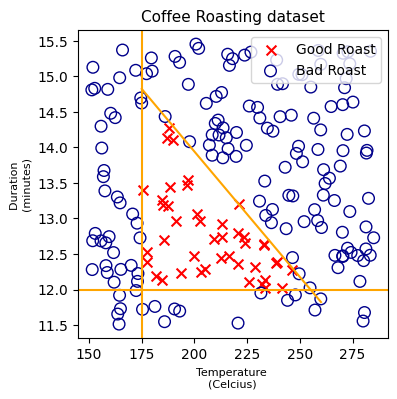

In [7]:
#plot for the data
coffee_roast_plot(X, Y)

In [24]:
#Trained weights and biases taken from Coursera Lab Course 2, Week 1, Lab 2- NN in python.
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Normalize the dataset

In [25]:
#calling zscore_norm to normalize the dataset
X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X_norm = zscore_norm(X, X_mean, X_std)

In [26]:
X_norm.describe()

,temperature,duration
count,2.000000e+02,2.000000e+02
mean,3.463896e-16,-1.634248e-15
std,1.002509e+00,1.002509e+00
min,-1.685218e+00,-1.699671e+00
25%,-8.490224e-01,-8.505645e-01
50%,3.965200e-02,-1.424914e-01
75%,8.518362e-01,8.696866e-01
max,1.659754e+00,1.793239e+00


In [56]:
#function that will compute results of forward propagation
def my_prediction(X, W1, b1, W2, b2):
    total_rows = X.shape[0]
    #array to store predictions
    y_predict = np.zeros((total_rows, 1))
    for i in range(total_rows):
        y_predict[i,0] = Sequential(X.iloc[i,:], W1, b1, W2, b2)
    return y_predict

In [41]:
#creating test data to check results
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
#convert to pandas dataframe. Zscore_norm() works on pandas df
x_test = pd.DataFrame(X_tst, columns = ['temperature', 'duration'])

**NOTE:** Always try avoiding the confusion between Numpy arrays and Pandas dataframes.  
Elements of pandas dataframe are accessed using the `.iloc[]` or `.loc[]` property whereas  
elements of numpy arrays are accessed simply by indexing.  
Most of the time you receive key-errors because you miss using `xtrain.iloc[i,:]` to access a particular row. (instead you write `xtrain[i,:]` which will return an error if `xtrain` is a pandas dataframe...)

In [43]:
#normalize the test set using X's mean and std
xtest_norm = zscore_norm(x_test, X_mean, X_std)

In [58]:
y_prediction = my_prediction(xtest_norm, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

Now, what we've received in `y_prediction` is a list of probabilities. In order to get binary results of 0 or 1, we need to apply a threshold.  
I'm taking the threshold to be 0.7.  
If the probability is >= 0.7, then it is a good-roasted coffee, otherwise bad-roasted coffee.

In [60]:
yhat = np.zeros_like(y_prediction)
for i in range(len(y_prediction)):
    if y_prediction[i] >= 0.7:
        yhat[i] = 1
    else:
        yhat[i] = 0

In [61]:
yhat

array([[1.],
       [0.]])

In [63]:
#shorter version of above code
yhat = (y_prediction >= 0.7).astype(int)
yhat

array([[1],
       [0]])